In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import sys
import numpy.linalg as la
from tabulate import tabulate
import random
from PIL import Image
import math

# 1d

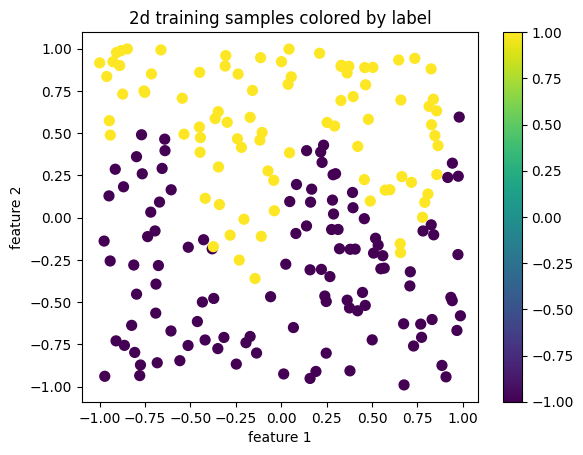

In [2]:
n = 200
p = 2
X = 2 * (np.random.rand(n, p) - 0.5)
y = np.sign(X[:, 1] - (X[:, 0] ** 2 / 2 + np.sin(X[:, 0] * 7) / 2))

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], 50, c=y)
plt.colorbar()
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("2d training samples colored by label")
plt.show()

In [3]:
def krr(sigma, lam):
    ### YOUR CODE STARTS HERE ###
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            # note: ||x_i - x_j||^2 = (x_i - x_j)^T (x_i - x_j) = (x_i - x_j) dot (x_i - x_j)
            K[i, j] = math.e ** (-(np.dot(X[i] - X[j], X[i] - X[j])) / (2 * sigma**2))
    alpha = la.inv(K + lam * np.eye(n)) @ y
    yhat = K @ alpha
    ### YOUR CODE ENDS HERE ###

    y2 = np.array(np.sign(yhat))
    plt.figure(2)
    plt.scatter(X[:, 0], X[:, 1], 50, c=y2)
    plt.colorbar()
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("2d training samples colored by PREDICTED label")
    plt.show()

    ntest = 2000
    Xtest = 2 * (np.random.rand(ntest, p) - 0.5)

    ### YOUR CODE STARTS HERE ###
    Ktest = np.zeros((ntest, n))
    for i in range(ntest):
        for j in range(n):
            # note: ||x_i - x_j||^2 = (x_i - x_j)^T (x_i - x_j) = (x_i - x_j) dot (x_i - x_j)
            Ktest[i, j] = math.e ** (-(np.dot(Xtest[i] - X[j], Xtest[i] - X[j])) / (2 * sigma**2))
    ytest = Ktest @ alpha
    ### YOUR CODE ENDS HERE ###

    plt.figure(3)
    plt.scatter(Xtest[:, 0], Xtest[:, 1], 50, c=np.array(ytest))
    plt.colorbar()
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("2d test samples colored by PREDICTED label (before taking sign)")
    plt.show()

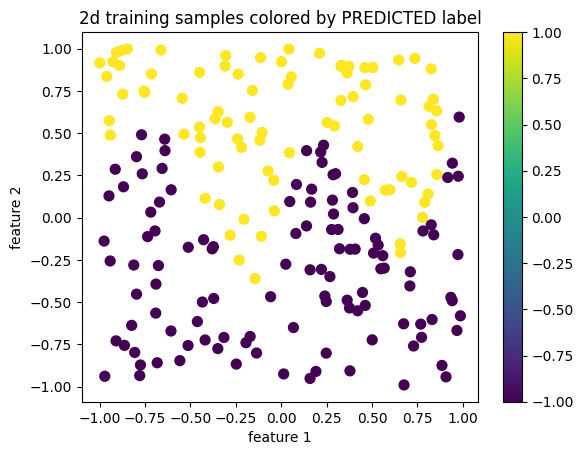

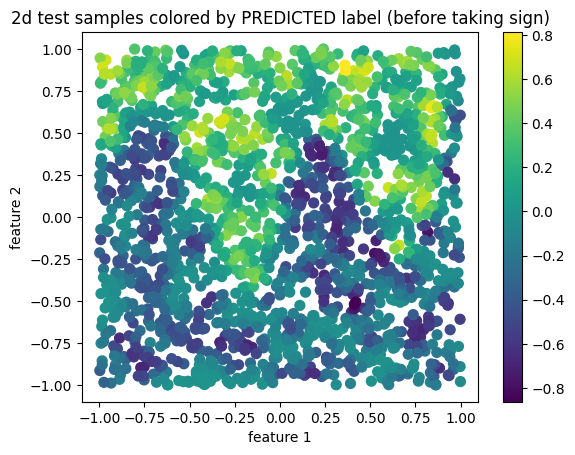

In [4]:
krr(sigma=0.05, lam=1)

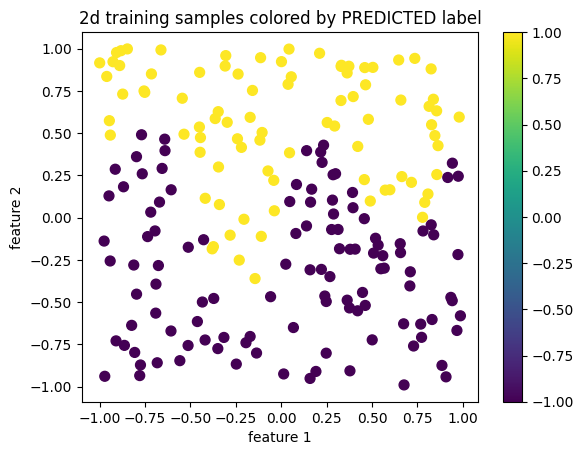

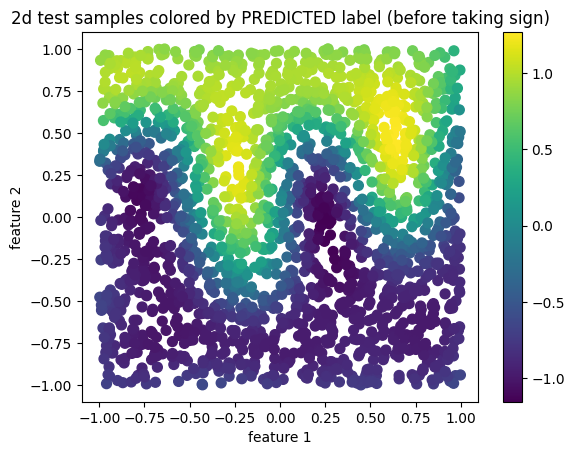

In [5]:
krr(sigma=0.25, lam=1)

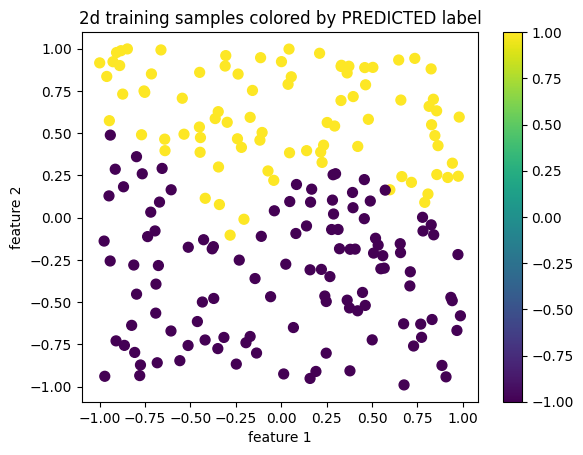

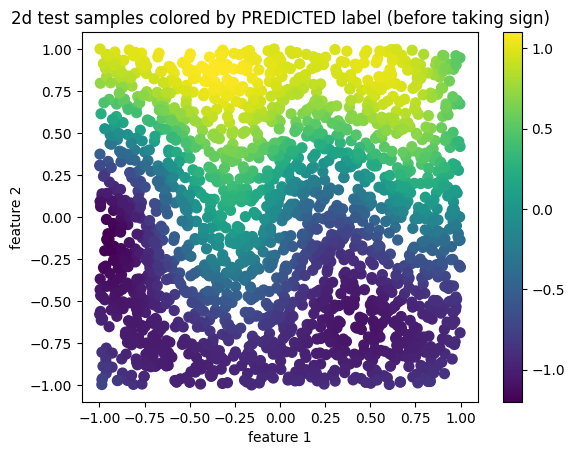

In [6]:
krr(sigma=0.5, lam=1)

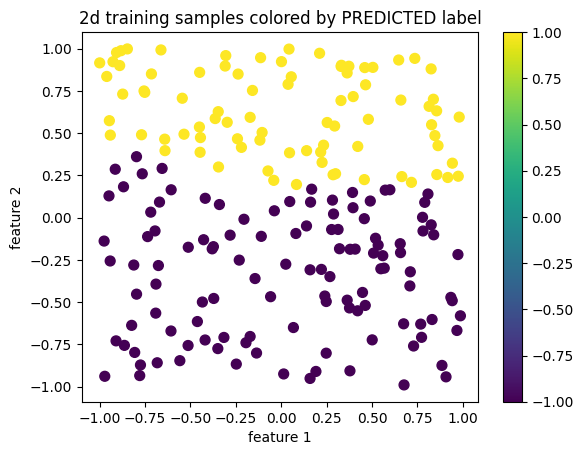

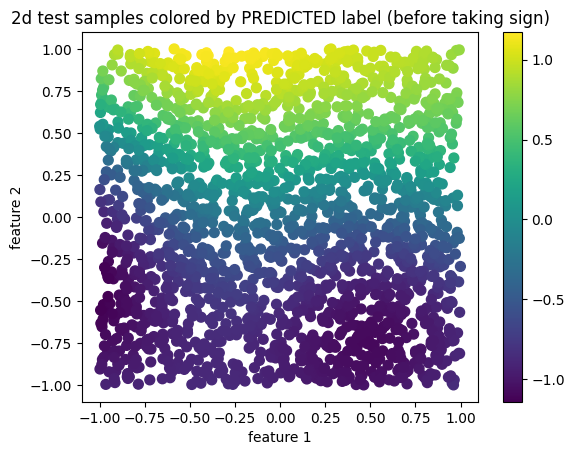

In [7]:
krr(sigma=0.75, lam=1)

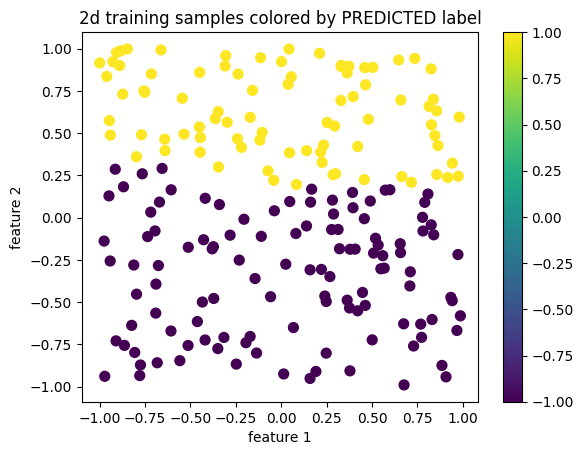

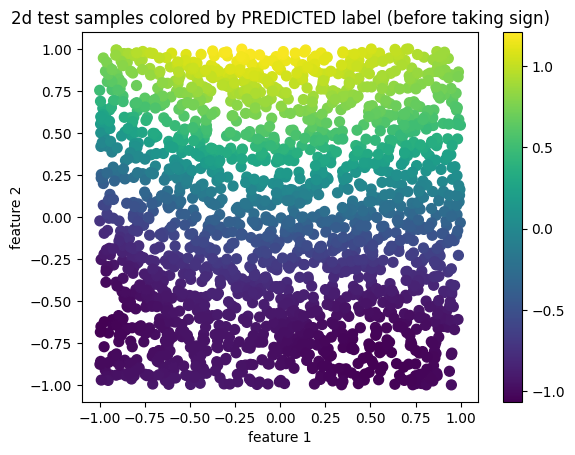

In [8]:
krr(sigma=1, lam=1)

We see that the model becomes more linear as $\sigma$ increases. When $\sigma = 0.05$, we see that the decision boundary in the test samples is not very distinct. On the other hand, when $\sigma = 0.8$ or $\sigma = 1$, for example, the decision boundary is significantly more linear compared to $\sigma = 0.25$, having a highly nonlinear decision boundary.

If we think of $K(x_i, x_j)$ as providing a similarity score between $x_i$ and $x_j$, we see that as $||x_i - x_j||$ decreases, $K(x_i, x_j)$ increases, which makes sense because if $x_i$ and $x_j$ are closer together, they should have a higher similarity score. Given this, we see that as $\sigma$ increases, $K(x_i, x_j)$ increases, meaning a higher $\sigma$ treats the same samples as more similar to each other. This means the decision boundary can incorporate information of both $x_i$ and $x_j$ without becoming too nonlinear since the $K(x_i, x_j)$ treats them as similar already. Therefore, we see that with higher $\sigma$, the decision boundary is more linear.